# Audio To Data
by Wael Radwan

#### this piece of late 

In [2]:
# -*- coding: utf-8 -*-
from subprocess import Popen, PIPE, STDOUT
import os
from PIL import Image
import eyed3

from sliceSpectrogram import createSlicesFromSpectrograms
from audioFilesTools import isMono, getGenre
from config import rawDataPath
from config import spectrogramsPath
from config import pixelPerSecond


#Tweakable parameters
desiredSize = 128


#Remove logs
eyed3.log.setLevel("ERROR")

In [7]:
#Create spectrogram from mp3 files
def createSpectrogram(filename,newFilename):
    #Create temporary mono track if needed
    print(rawDataPath+filename)
    if isMono(rawDataPath+filename):
        command = "cp '{}' '/tmp/{}.mp3'".format(rawDataPath+filename,newFilename)
    else:
        command = "sox '{}' '/tmp/{}.mp3' remix 1,2".format(rawDataPath+filename,newFilename)
    print(command)
    p = Popen(command, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True, cwd=currentPath)
    output, errors = p.communicate()
    if errors:
        print (errors)

    #Create spectrogram
    filename.replace(".mp3","")
    command = "sox '/tmp/{}.mp3' -n spectrogram -Y 200 -X {} -m -r -o '{}.png'".format(newFilename,pixelPerSecond,spectrogramsPath+newFilename)
    p = Popen(command, shell=True, stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True, cwd=currentPath)
    output, errors = p.communicate()
    if errors:
        print (errors)

    #Remove tmp mono track
    os.remove("/tmp/{}.mp3".format(newFilename))

### Creates .png whole spectrograms from mp3 files

In [8]:
def createSpectrogramsFromAudio():
    genresID = dict()
    files = os.listdir(rawDataPath)
    files = [file for file in files if file.endswith(".mp3")]
    nbFiles = len(files)

    #Create path if not existing
    if not os.path.exists(os.path.dirname(spectrogramsPath)):
        try:
            os.makedirs(os.path.dirname(spectrogramsPath))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

    #Rename files according to genre
    for index,filename in enumerate(files):
        print ("Creating spectrogram for file {}/{}...".format(index+1,nbFiles))
        fileGenre = getGenre(rawDataPath+filename)
        genresID[fileGenre] = genresID[fileGenre] + 1 if fileGenre in genresID else 1
        fileID = genresID[fileGenre]
        newFilename = fileGenre+"_"+str(fileID)
        createSpectrogram(filename,newFilename)

### Whole pipeline .mp3 -> .png slices

In [14]:
def createSlicesFromAudio():
    print ("Creating spectrograms...")
    createSpectrogramsFromAudio()
    print ("Spectrograms created!")

    print ("Creating slices...")
    createSlicesFromSpectrograms(desiredSize)
    print ("Slices created!")

In [5]:
filename='999_0002.mp3'
newFilename='999_0002.png'
createSpectrogram(filename,newFilename)

NameError: name 'createSpectrogram' is not defined

In [5]:
print(rawDataPath+filename)
isMono(rawDataPath+filename)

/ds/dataset/quran/999/999_0002.mp3


False

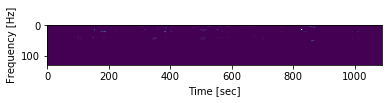

In [6]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import librosa

y, sr = librosa.load(rawDataPath+filename)
librosa.output.write_wav('file_trim_5s.wav', y, sr)
sample_rate, samples = wavfile.read('file_trim_5s.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [8]:
import sox

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    
